# Preparation

## Import libraries

In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
from sklearn.naive_bayes import GaussianNB

## Import data

In [75]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [76]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

In [77]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [78]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Balance the imbalaced data

In [79]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

## Create Scoring Dataframe

In [80]:
score_df = pd.DataFrame(columns = ['model', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'train_accuracy', 
                            'train_precision', 'train_recall'])

# Model 1 - Gaussian

In [81]:
gnb = GaussianNB()
gnb.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB()

## Predict

In [82]:
predictions_from_X_train = gnb.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb.predict(X_test_scaled)

## Scoring

### Train Scoring

Accuracy: 53.2%
Precision: 51.7%
Recall: 97.6%
F1: 67.6%
Conufusion Matrix: 
[[ 3887 39873]
 [ 1048 42712]]




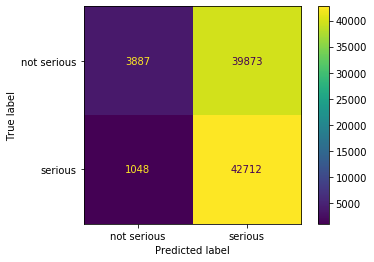

In [83]:
f.scoring(predictions_from_X_train, y_train_balanced, gnb, X_train_scaled_balanced)

### Test Scoring

Accuracy: 10.3%
Precision: 1.9%
Recall: 89.9%
F1: 3.8%
Conufusion Matrix: 
[[ 950 9976]
 [  22  196]]




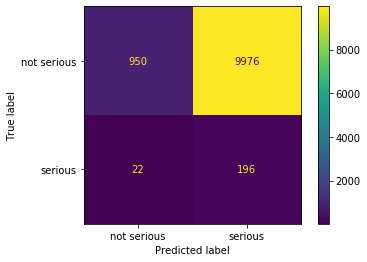

In [84]:
f.scoring(predictions_from_X_test, y_test, gnb, X_test_scaled)

## Add Scores to Scoring Dataframe

In [85]:
score_df = f.add_scores_to_df("Gaussian1", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773


# Model 2 - Categorical 1

In [86]:
from sklearn.naive_bayes import CategoricalNB

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

In [87]:
X_train_scaled.shape

(44574, 75)

In [88]:
y_train.shape

(44574,)

In [89]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [90]:
predictions_from_X_train = cnb.predict(X_train)
predictions_from_X_test = cnb.predict(X_test)

## Scoring 

### Train Scoring

Accuracy: 98.1%
Precision: 11.8%
Recall: 0.2%
F1: 0.5%
Conufusion Matrix: 
[[43745    15]
 [  812     2]]




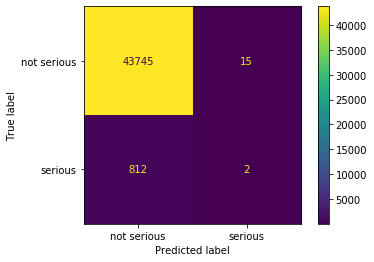

In [91]:
f.scoring(predictions_from_X_train, y_train, cnb, X_train)

### Test Scoring

Accuracy: 98.0%
Precision: 0.0%
Recall: 0.0%
F1: 0.0%
Conufusion Matrix: 
[[10921     5]
 [  218     0]]




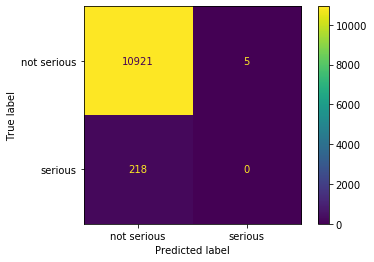

In [92]:
f.scoring(predictions_from_X_test, y_test, cnb, X_test)

## Add to DF

In [93]:
score_df = f.add_scores_to_df("Categorical1", score_df, y_test, predictions_from_X_test, y_train, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000


# Model 3 - Categorical 2

In [94]:
# Remove continuous variables

In [95]:
df_cat = df.drop(columns=['posted_speed_limit', 'num_units', 'age'])

In [96]:
X = df_cat.drop(['serious_accident'], axis=1)
y = df_cat.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [97]:
cnb2 = CategoricalNB()
cnb2.fit(X_train, y_train)

CategoricalNB()

In [98]:
predictions_from_X_train = cnb2.predict(X_train)
predictions_from_X_test = cnb2.predict(X_test)

Accuracy: 98.2%
Precision: 33.3%
Recall: 0.1%
F1: 0.2%
Conufusion Matrix: 
[[43758     2]
 [  813     1]]




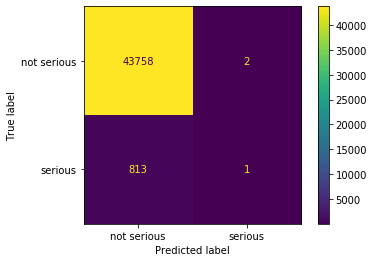

In [99]:
f.scoring(predictions_from_X_train, y_train, cnb2, X_train)

Accuracy: 98.0%
Precision: 0.0%
Recall: 0.0%
F1: 0.0%
Conufusion Matrix: 
[[10925     1]
 [  218     0]]




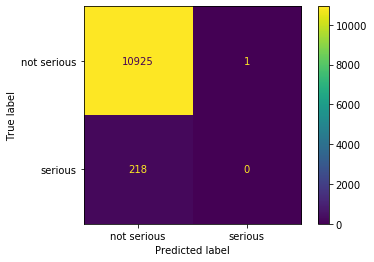

In [100]:
f.scoring(predictions_from_X_test, y_test, cnb2, X_test)

In [101]:
score_df = f.add_scores_to_df("Categorical2", score_df, y_test, predictions_from_X_test, y_train, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000
0,Categorical2,98.172,98.035,33.333,0.000,0.123,0.000,0.245,0.000


# Model 4 - Gaussian 2

In [102]:
gnb2 = GaussianNB(var_smoothing=0.5)
gnb2.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB(var_smoothing=0.5)

## Predict

In [103]:
predictions_from_X_train = gnb.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb.predict(X_test_scaled)

## Scoring

### Train Scoring

Accuracy: 53.2%
Precision: 51.7%
Recall: 97.6%
F1: 67.6%
Conufusion Matrix: 
[[ 3887 39873]
 [ 1048 42712]]




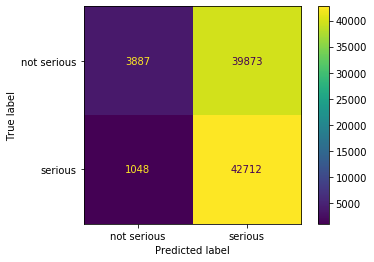

In [104]:
f.scoring(predictions_from_X_train, y_train_balanced, gnb, X_train_scaled_balanced)

### Test Scoring

Accuracy: 10.3%
Precision: 1.9%
Recall: 89.9%
F1: 3.8%
Conufusion Matrix: 
[[ 950 9976]
 [  22  196]]




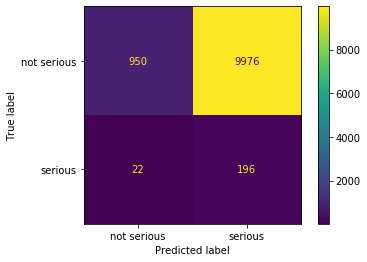

In [105]:
f.scoring(predictions_from_X_test, y_test, gnb, X_test_scaled)

## Add Scores to Scoring Dataframe

In [106]:
score_df = f.add_scores_to_df("Gaussian2", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000
0,Categorical2,98.172,98.035,33.333,0.000,0.123,0.000,0.245,0.000
0,Gaussian2,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773


# Model 5 - Gaussian with GridSearch

In [107]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [108]:
param_grid = {
    'var_smoothing': [.75, .5, .1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
}

In [109]:
gnb3 = GaussianNB()

In [110]:
gauss_grid_search = GridSearchCV(gnb3, param_grid, cv=3, scoring='recall')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Recall: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing Recall: 97.96%

Optimal Parameters: {'var_smoothing': 1e-10}


In [111]:
param_grid = {
    'var_smoothing': [1e-10, 1e-11, 1e-12]
}

In [112]:
gauss_grid_search = GridSearchCV(gnb3, param_grid, cv=3, scoring='recall')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Recall: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing Recall: 98.42%

Optimal Parameters: {'var_smoothing': 1e-12}


In [113]:
param_grid = {
    'var_smoothing': [1e-12, 1e-13, 1e-14, 1e-15]
}

In [114]:
gauss_grid_search = GridSearchCV(gnb3, param_grid, cv=3, scoring='recall')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Recall: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing Recall: 98.59%

Optimal Parameters: {'var_smoothing': 1e-15}


In [115]:
gnb3 = GaussianNB(var_smoothing= 1e-15)

In [116]:
gnb3.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB(var_smoothing=1e-15)

In [117]:
predictions_from_X_train = gnb3.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb3.predict(X_test_scaled)

In [118]:
score_df = f.add_scores_to_df("Gaussian3", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000
0,Categorical2,98.172,98.035,33.333,0.000,0.123,0.000,0.245,0.000
0,Gaussian2,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Gaussian3,53.135,9.323,51.643,1.954,98.549,92.202,67.771,3.826


In [119]:
gnb4 = GaussianNB(var_smoothing= 1e-20)
gnb4.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB(var_smoothing=1e-20)

In [120]:
predictions_from_X_train = gnb4.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb4.predict(X_test_scaled)

In [121]:
score_df = f.add_scores_to_df("Gaussian4", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000
0,Categorical2,98.172,98.035,33.333,0.000,0.123,0.000,0.245,0.000
0,Gaussian2,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Gaussian3,53.135,9.323,51.643,1.954,98.549,92.202,67.771,3.826
0,Gaussian4,53.251,9.243,51.700,1.952,98.853,92.202,67.892,3.823


In [122]:
1* 10 ** -20

1e-20

In [123]:
exp = [20, 30, 40, 50, 60, 70, 80, 90, 100]

In [124]:
coeff = []
for x in exp:
    new = 1 * 10 ** - x
    coeff.append(new)
coeff

[1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100]

In [125]:
param_grid = {
    'var_smoothing': coeff
}

In [126]:
gauss_grid_search = GridSearchCV(gnb3, param_grid, cv=3, scoring='recall')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Recall: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing Recall: 99.08%

Optimal Parameters: {'var_smoothing': 1e-40}


## GNB 5

In [127]:
gnb5 = GaussianNB(var_smoothing= 1e-30)
gnb5.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB(var_smoothing=1e-30)

In [128]:
predictions_from_X_train = gnb5.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb5.predict(X_test_scaled)

In [129]:
score_df = f.add_scores_to_df("Gaussian5", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000
0,Categorical2,98.172,98.035,33.333,0.000,0.123,0.000,0.245,0.000
0,Gaussian2,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Gaussian3,53.135,9.323,51.643,1.954,98.549,92.202,67.771,3.826
0,Gaussian4,53.251,9.243,51.700,1.952,98.853,92.202,67.892,3.823
0,Gaussian5,52.418,7.448,51.249,1.970,99.168,94.954,67.576,3.859


Accuracy: 7.4%
Precision: 2.0%
Recall: 95.0%
F1: 3.9%
Conufusion Matrix: 
[[  623 10303]
 [   11   207]]




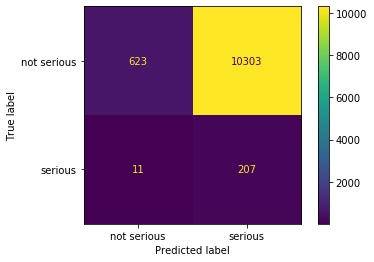

In [130]:
f.scoring(predictions_from_X_test, y_test, gnb5, X_test_scaled)

Here I have optimized for recall, but there's so many that it's useless. Everything will be labels as potentially serious. 

# Model 6 - F1 Optimization

In [131]:
gnb6 = GaussianNB()
gnb6.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB()

In [132]:
exp = [1, 3, 5, 7, 10, 13, 15, 17, 20, 30, 40, 50, 60, 70, 80, 90, 100]

coeff = []
for x in exp:
    new = 1 * 10 ** - x
    coeff.append(new)
coeff

[0.1,
 0.001,
 1e-05,
 1e-07,
 1e-10,
 1e-13,
 1e-15,
 1e-17,
 1e-20,
 1e-30,
 1e-40,
 1e-50,
 1e-60,
 1e-70,
 1e-80,
 1e-90,
 1e-100]

In [133]:
param_grid = {
    'var_smoothing': coeff
}

In [134]:
gauss_grid_search = GridSearchCV(gnb6, param_grid, cv=3, scoring='f1')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing F1: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing F1: 68.25%

Optimal Parameters: {'var_smoothing': 0.1}


In [135]:
exp = [.1, .3, .5, .7, 1]

coeff = []
for x in exp:
    new = 1 * 10 ** - x
    coeff.append(new)
coeff

[0.7943282347242815,
 0.5011872336272722,
 0.31622776601683794,
 0.19952623149688797,
 0.1]

In [136]:
param_grid = {
    'var_smoothing': coeff
}

In [137]:
gauss_grid_search = GridSearchCV(gnb6, param_grid, cv=3, scoring='f1')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing F1: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing F1: 68.25%

Optimal Parameters: {'var_smoothing': 0.1}


In [138]:
gnb6 = GaussianNB(var_smoothing = 0.1)
gnb6.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB(var_smoothing=0.1)

In [139]:
predictions_from_X_train = gnb6.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb6.predict(X_test_scaled)

Accuracy: 20.6%
Precision: 2.0%
Recall: 82.6%
F1: 3.9%
Conufusion Matrix: 
[[2117 8809]
 [  38  180]]




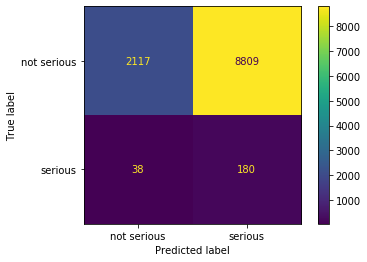

In [140]:
f.scoring(predictions_from_X_test, y_test, gnb6, X_test_scaled)

In [150]:
score_df = f.add_scores_to_df("Gaussian6", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian1,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Categorical1,98.145,97.999,11.765,0.000,0.246,0.000,0.481,0.000
0,Categorical2,98.172,98.035,33.333,0.000,0.123,0.000,0.245,0.000
0,Gaussian2,53.244,10.284,51.719,1.927,97.605,89.908,67.612,3.773
0,Gaussian3,53.135,9.323,51.643,1.954,98.549,92.202,67.771,3.826
0,Gaussian4,53.251,9.243,51.700,1.952,98.853,92.202,67.892,3.823
0,Gaussian5,52.418,7.448,51.249,1.970,99.168,94.954,67.576,3.859
0,Gaussian6,56.464,20.612,53.707,2.002,93.652,82.569,68.265,3.910


# Model 7 - Precision Optimization

I'm going to try to optimize for precision and see what happens.

In [145]:
gnb7 = GaussianNB()

In [146]:
exp = [1, 3, 5, 7, 10, 13, 15, 17, 20, 30, 40, 50, 60, 70, 80, 90, 100]

coeff = []
for x in exp:
    new = 1 * 10 ** - x
    coeff.append(new)
    
param_grid = {
    'var_smoothing': coeff
}

In [147]:
gauss_grid_search = GridSearchCV(gnb7, param_grid, cv=3, scoring='precision')
gauss_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Precision: {gauss_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gauss_grid_search.best_params_}")

Testing Precision: 53.71%

Optimal Parameters: {'var_smoothing': 0.1}


Optimizing for Precision and for F1, it's still the same `var_smoothing` of 0.1. Gaussian 6 is the same as Gaussian 7.

Looking at the scoring chart, it looks like this model will always overfit for precision, but recall is closer between train and test data. I will say that Gaussian 6 is the best model, because it's the most useful in that it's F1. But still it's not that useful.

# Export DF of Gaussian 6 for presentation

In [151]:
score_df.loc[score_df['model'] == "Gaussian6"]

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Gaussian6,56.464,20.612,53.707,2.002,93.652,82.569,68.265,3.91
